In [39]:
import csv
file = open('match_results.tsv', 'r')
reader = csv.reader(file, delimiter='\t')

In [40]:
import numpy as np
# total per source
primary_labels = np.array([0, 0, 0])
aliases = np.array([0, 0, 0])
no_match = np.array([0, 0, 0])

for row in reader:
    if row[0] == 'Label':
        continue  # skip
    else:
        rows += 1
        
        for i in range(1, 4):
            if row[i] == "MatchType.PRIMARY_LABEL":
                primary_labels[i - 1] += 1
            elif row[i] == "MatchType.ALIAS":
                aliases[i - 1] += 1
            elif row[i] == "MatchType.NO_MATCH":
                no_match[i - 1] += 1
            else:
                raise Exception

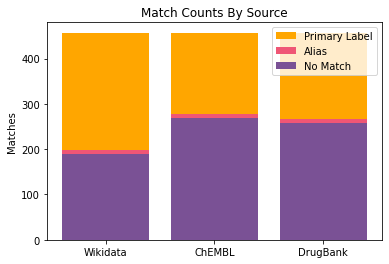

In [47]:
import matplotlib.pyplot as plt
labels = ['Wikidata', 'ChEMBL', 'DrugBank']
indices = [i for i,_ in enumerate(labels)]
p1 = plt.bar(indices, no_match, label='no_match', color='#ffa600', bottom=primary_labels+aliases)
p2 = plt.bar(indices, aliases, label='aliases', color='#ef5675', bottom=primary_labels)
p3 = plt.bar(indices, primary_labels, label='primary_labels', color='#7a5195')
plt.ylabel('Matches')
plt.title('Match Counts By Source')
plt.xticks(indices, labels)
plt.legend((p1[0], p2[0], p3[0]), ('No Match', 'Alias', 'Primary Label'))
plt.show()

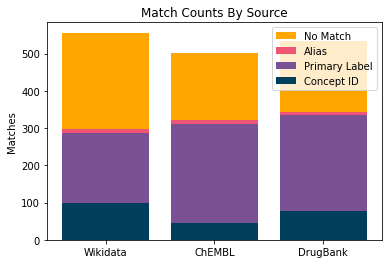

In [52]:
labels = ['Wikidata', 'ChEMBL', 'DrugBank']
indices = [i for i,_ in enumerate(labels)]
full_match = np.array([99, 44, 78])
p1 = plt.bar(indices, no_match, label='no_match', color='#ffa600', bottom=full_match+primary_labels+aliases)
p2 = plt.bar(indices, aliases, label='aliases', color='#ef5675', bottom=full_match+primary_labels)
p3 = plt.bar(indices, primary_labels, label='primary_labels', color='#7a5195', bottom=full_match)
p4 = plt.bar(indices, full_match, label='full_match', color='#003f5c')
plt.ylabel('Matches')
plt.title('Match Counts By Source')
plt.xticks(indices, labels)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('No Match', 'Alias', 'Primary Label', 'Concept ID'))
plt.show()